### Neural Network ML model

(Features) **X-variables**: region, date, units sold, production data, climate data, import data, export data, median income.

(Target) **y-variable:** avocado price (numerical outcome)

In [10]:
# Import dependencies.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Load the avocado_mock_df.csv dataset.
avocado_mock_df = pd.read_csv(Path('././MOCK_datasets_ML/MockDataset_Avocado_ML.csv'))
avocado_mock_df.head(10)

,REGION (city),LATITUDE,LONGITUDE,DATE (Month + Year),4046 Units sold,4225 Units,4770 Units,Bags sold,CLIMATE_CA_pcp,CLIMATE_CA_tmin,...,PERU PRODUCTION,COLUMBIA PRODUCTION,IMPORTS BY VALUE ($1000),IMPORTS BY VOLUME (1000 LBS),IMPORTS UNIT VALUE ($ PER POUND),EXPORTS BY VALUE ($1000),EXPORTS BY VOLUME (1000 LBS),EXPORTS UNIT VALUE ($ PER POUND),MEDIAN INCOME,PRICE
0,Los Angeles,34.0522,118.2437,1/1/2017,1223299.39,829896.69,56808.74,1441332.35,6.48,36.6,...,0,0,207387693,214329.7208,0.967611,1660842,994.194413,1.670540,64251,0.84
1,San Diego,32.7157,117.1611,1/1/2017,149666.20,206181.12,15014.45,189448.58,6.48,36.6,...,0,0,207387693,214329.7208,0.967611,1660842,994.194413,1.670540,74855,0.93
2,San Francisco,37.7749,122.4194,1/1/2017,260100.73,717625.67,2490.66,66958.27,6.48,36.6,...,0,0,207387693,214329.7208,0.967611,1660842,994.194413,1.670540,104552,0.95
3,Sacramento,38.5816,121.4944,1/1/2017,144876.31,339664.16,660.97,41564.20,6.48,36.6,...,0,0,207387693,214329.7208,0.967611,1660842,994.194413,1.670540,63902,0.98
4,Los Angeles,34.0522,118.2437,2/1/2017,5470227.08,1741607.02,937331.61,2701609.82,3.65,37.5,...,0,0,182421005,157957.1830,1.154876,2119913,1400.845874,1.513309,64251,0.53
5,San Diego,32.7157,117.1611,2/1/2017,260418.91,290223.93,20313.95,321784.08,3.65,37.5,...,0,0,182421005,157957.1830,1.154876,2119913,1400.845874,1.513309,74855,0.63
6,San Francisco,37.7749,122.4194,2/1/2017,560686.25,900172.65,21331.13,75785.02,3.65,37.5,...,0,0,182421005,157957.1830,1.154876,2119913,1400.845874,1.513309,104552,0.84
7,Sacramento,38.5816,121.4944,2/1/2017,321474.22,418158.93,11962.44,57213.28,3.65,37.5,...,0,0,182421005,157957.1830,1.154876,2119913,1400.845874,1.513309,63902,0.98
8,Los Angeles,34.0522,118.2437,3/1/2017,2768930.88,897311.08,518369.51,1269943.15,2.19,37.2,...,0,0,224948272,171411.0822,1.312332,4549077,2623.655244,1.733870,64251,0.99
9,San Diego,32.7157,117.1611,3/1/2017,163424.69,176304.67,19186.14,158785.76,2.19,37.2,...,0,0,224948272,171411.0822,1.312332,4549077,2623.655244,1.733870,74855,1.04


In [11]:
# Drop the non-beneficial columns.
# Make a copy of df
avocado_mock_df.drop(columns=["CLIMATE_CA_pcp", "CLIMATE_CA_tmin", "CLIMATE_CA_tmax", "DATE (Month + Year)"], inplace=True)
avocado_mock_df.head()

,REGION (city),LATITUDE,LONGITUDE,4046 Units sold,4225 Units,4770 Units,Bags sold,TOTAL_VOLUME,CALIFORNIA PRODUCTION,CHILE PRODUCTION,...,PERU PRODUCTION,COLUMBIA PRODUCTION,IMPORTS BY VALUE ($1000),IMPORTS BY VOLUME (1000 LBS),IMPORTS UNIT VALUE ($ PER POUND),EXPORTS BY VALUE ($1000),EXPORTS BY VOLUME (1000 LBS),EXPORTS UNIT VALUE ($ PER POUND),MEDIAN INCOME,PRICE
0,Los Angeles,34.0522,118.2437,1223299.39,829896.69,56808.74,1441332.35,45670156,899349,519433,...,0,0,207387693,214329.7208,0.967611,1660842,994.194413,1.670540,64251,0.84
1,San Diego,32.7157,117.1611,149666.20,206181.12,15014.45,189448.58,45670156,899349,519433,...,0,0,207387693,214329.7208,0.967611,1660842,994.194413,1.670540,74855,0.93
2,San Francisco,37.7749,122.4194,260100.73,717625.67,2490.66,66958.27,45670156,899349,519433,...,0,0,207387693,214329.7208,0.967611,1660842,994.194413,1.670540,104552,0.95
3,Sacramento,38.5816,121.4944,144876.31,339664.16,660.97,41564.20,45670156,899349,519433,...,0,0,207387693,214329.7208,0.967611,1660842,994.194413,1.670540,63902,0.98
4,Los Angeles,34.0522,118.2437,5470227.08,1741607.02,937331.61,2701609.82,47371481,2635471,0,...,0,0,182421005,157957.1830,1.154876,2119913,1400.845874,1.513309,64251,0.53


In [12]:
# Determine the number of unique values in each column.
avo_cat = avocado_mock_df.dtypes.index.tolist()
avocado_mock_df[avo_cat].nunique()

REGION (city)                        4
LATITUDE                             4
LONGITUDE                            4
4046 Units sold                     12
4225 Units                          12
4770 Units                          12
Bags sold                           12
TOTAL_VOLUME                         3
CALIFORNIA PRODUCTION                3
CHILE PRODUCTION                     2
MEXICO PRODUCTION                    3
PERU PRODUCTION                      1
COLUMBIA PRODUCTION                  1
IMPORTS BY VALUE ($1000)             3
IMPORTS BY VOLUME (1000 LBS)         3
IMPORTS UNIT VALUE ($ PER POUND)     3
EXPORTS BY VALUE ($1000)             3
EXPORTS BY VOLUME (1000 LBS)         3
EXPORTS UNIT VALUE ($ PER POUND)     3
MEDIAN INCOME                        4
PRICE                               10
dtype: int64

In [13]:
avocado_mock_df.dtypes

REGION (city)                        object
LATITUDE                            float64
LONGITUDE                           float64
4046 Units sold                     float64
4225 Units                          float64
4770 Units                          float64
Bags sold                           float64
TOTAL_VOLUME                          int64
CALIFORNIA PRODUCTION                 int64
CHILE PRODUCTION                      int64
MEXICO PRODUCTION                     int64
PERU PRODUCTION                       int64
COLUMBIA PRODUCTION                   int64
IMPORTS BY VALUE ($1000)              int64
IMPORTS BY VOLUME (1000 LBS)        float64
IMPORTS UNIT VALUE ($ PER POUND)    float64
EXPORTS BY VALUE ($1000)              int64
EXPORTS BY VOLUME (1000 LBS)        float64
EXPORTS UNIT VALUE ($ PER POUND)    float64
MEDIAN INCOME                         int64
PRICE                               float64
dtype: object

In [14]:
# Look at SPECIFIC value counts for binning
avocado_mock_df['CALIFORNIA PRODUCTION'].value_counts()

2635471    4
4997613    4
899349     4
Name: CALIFORNIA PRODUCTION, dtype: int64

LinAlgError: singular matrix

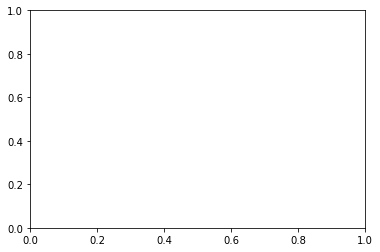

In [15]:
## Visualize the value counts of avocado_mock_df['CALIFORNIA PRODUCTION']
ca_prod = avocado_mock_df['CALIFORNIA PRODUCTION'].value_counts()
ca_prod.plot.density()

In [16]:
# Determine which values to replace if counts are less than ...?
replace_ca_prod = list(ca_prod[ca_prod < 500000].index)

## Replace in dataframe
for ca_p in replace_ca_prod:
    avocado_mock_df['CALIFORNIA PRODUCTION'] = avocado_mock_df['CALIFORNIA PRODUCTION'].replace(ca_p,"Other")
    
# Check to make sure binning was successful
avocado_mock_df['CALIFORNIA PRODUCTION'].value_counts()

Other    12
Name: CALIFORNIA PRODUCTION, dtype: int64

In [17]:
# Generate our categorical variable lists
avocado_cat = avocado_mock_df.dtypes[avocado_mock_df.dtypes == "object"].index.tolist()

In [18]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(avocado_mock_df[avocado_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(avocado_cat)
encode_df.head()

,REGION (city)_Los Angeles,REGION (city)_Sacramento,REGION (city)_San Diego,REGION (city)_San Francisco,CALIFORNIA PRODUCTION_Other
0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,0.0,1.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0


In [19]:
# Merge one-hot encoded features and drop the originals
avocado_mock_df = avocado_mock_df.merge(encode_df,left_index=True, right_index=True)
avocado_mock_df = avocado_mock_df.drop(avocado_cat,1)
avocado_mock_df.head()

,LATITUDE,LONGITUDE,4046 Units sold,4225 Units,4770 Units,Bags sold,TOTAL_VOLUME,CHILE PRODUCTION,MEXICO PRODUCTION,PERU PRODUCTION,...,EXPORTS BY VALUE ($1000),EXPORTS BY VOLUME (1000 LBS),EXPORTS UNIT VALUE ($ PER POUND),MEDIAN INCOME,PRICE,REGION (city)_Los Angeles,REGION (city)_Sacramento,REGION (city)_San Diego,REGION (city)_San Francisco,CALIFORNIA PRODUCTION_Other
0,34.0522,118.2437,1223299.39,829896.69,56808.74,1441332.35,45670156,519433,44251374,0,...,1660842,994.194413,1.670540,64251,0.84,1.0,0.0,0.0,0.0,1.0
1,32.7157,117.1611,149666.20,206181.12,15014.45,189448.58,45670156,519433,44251374,0,...,1660842,994.194413,1.670540,74855,0.93,0.0,0.0,1.0,0.0,1.0
2,37.7749,122.4194,260100.73,717625.67,2490.66,66958.27,45670156,519433,44251374,0,...,1660842,994.194413,1.670540,104552,0.95,0.0,0.0,0.0,1.0,1.0
3,38.5816,121.4944,144876.31,339664.16,660.97,41564.20,45670156,519433,44251374,0,...,1660842,994.194413,1.670540,63902,0.98,0.0,1.0,0.0,0.0,1.0
4,34.0522,118.2437,5470227.08,1741607.02,937331.61,2701609.82,47371481,0,44736010,0,...,2119913,1400.845874,1.513309,64251,0.53,1.0,0.0,0.0,0.0,1.0


In [20]:
# Split our preprocessed data into our features and target arrays
y = avocado_mock_df["PRICE"].values
X = avocado_mock_df.drop(["PRICE"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Compile, Train and Evaluate the Model

In [22]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 210
hidden_nodes_layer2 = 90
#hidden_nodes_layer3 = 40

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 210)               5040      
_________________________________________________________________
dense_1 (Dense)              (None, 90)                18990     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 91        
Total params: 24,121
Trainable params: 24,121
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [24]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=1000)

In [26]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
1/1 [==============================] - 0s 8ms/step - loss: 0.5871 - accuracy: 0.0000e+00
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4747 - accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.3803 - accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 0s 1000us/step - loss: 0.2987 - accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 0s 1ms/step - loss: 0.2279 - accuracy: 0.0000e+00
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1656 - accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 0.1086 - accuracy: 0.0000e+00
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.0000e+00
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.0000e+00
Epoch 10/100
1/1 [==============================] - 0s 1000us/step - loss: -0.0420 - acc

1/1 [==============================] - 0s 2ms/step - loss: -25.0377 - accuracy: 0.0000e+00
Epoch 81/100
1/1 [==============================] - 0s 4ms/step - loss: -26.0788 - accuracy: 0.0000e+00
Epoch 82/100
1/1 [==============================] - 0s 2ms/step - loss: -27.1524 - accuracy: 0.0000e+00
Epoch 83/100
1/1 [==============================] - 0s 5ms/step - loss: -28.2568 - accuracy: 0.0000e+00
Epoch 84/100
1/1 [==============================] - 0s 2ms/step - loss: -29.3939 - accuracy: 0.0000e+00
Epoch 85/100
1/1 [==============================] - 0s 3ms/step - loss: -30.5634 - accuracy: 0.0000e+00
Epoch 86/100
1/1 [==============================] - 0s 2ms/step - loss: -31.7662 - accuracy: 0.0000e+00
Epoch 87/100
1/1 [==============================] - 0s 2ms/step - loss: -33.0022 - accuracy: 0.0000e+00
Epoch 88/100
1/1 [==============================] - 0s 3ms/step - loss: -34.2736 - accuracy: 0.0000e+00
Epoch 89/100
1/1 [==============================] - 0s 4ms/step - loss: -35.5

In [27]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1/1 - 0s - loss: -2.8234e+00 - accuracy: 0.0000e+00
Loss: -2.8234100341796875, Accuracy: 0.0


In [28]:
# Export our model to HDF5 file
#nn.save("Avocado_price.h5")